<a href="https://colab.research.google.com/github/alexandrebsimao/nyc-traffic-accidents/blob/main/NYC_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acidentes de trânsito na Cidade de New York

Levantar as informações do dataset fornecidas pelo orgão de trasito a fim de analisar os bairros e as ruas com maior indice de acidentes, assim como o periodo com maior número de ocorrências e quais são as maiores ocorrências.

### Carregando as bibliotecas e o dataset

In [155]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Pós Graduação/Big Data e Data Science/Data Science/NYC Accidents 2020.csv')

### Visualizando o primeiros registros do dataset

In [156]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


### Quais são os campos e os tipos

In [157]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

### Quantas colunas possui o dataset

In [158]:
df.columns.size

29

### Selecionando somente as colunas necessárias

In [159]:
df = df[['CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE', 'BOROUGH', 'ON STREET NAME', 'CROSS STREET NAME',
'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1']]

In [160]:
df.columns.size

16

### Quantos registros nulos possui cada coluna

In [161]:
df.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
LATITUDE                          5946
LONGITUDE                         5946
BOROUGH                          25741
ON STREET NAME                   19437
CROSS STREET NAME                39200
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1      304
dtype: int64

### Remover registros em que o campo 'BOROUGH' é vazio

In [162]:
df = df.dropna(subset=['BOROUGH'])

### Remover os registros em que o fator de acidente se encontra como 'Unspecified'

In [163]:
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']


### Quantidade de ocorrências por fator do acidente

In [164]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Driver Inattention/Distraction                           12241
Failure to Yield Right-of-Way                             3390
Backing Unsafely                                          2249
Following Too Closely                                     2204
Passing Too Closely                                       1916
Passing or Lane Usage Improper                            1785
Other Vehicular                                           1440
Traffic Control Disregarded                               1060
Turning Improperly                                         993
Unsafe Speed                                               974
Driver Inexperience                                        825
Unsafe Lane Changing                                       724
Alcohol Involvement                                        668
Reaction to Uninvolved Vehicle                             468
View Obstructed/Limited                                    457
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  

### Quantidade de ocorrências por fator do acidente em gráfico
Apenas os 20 primeiros fatores que mais ocorrem

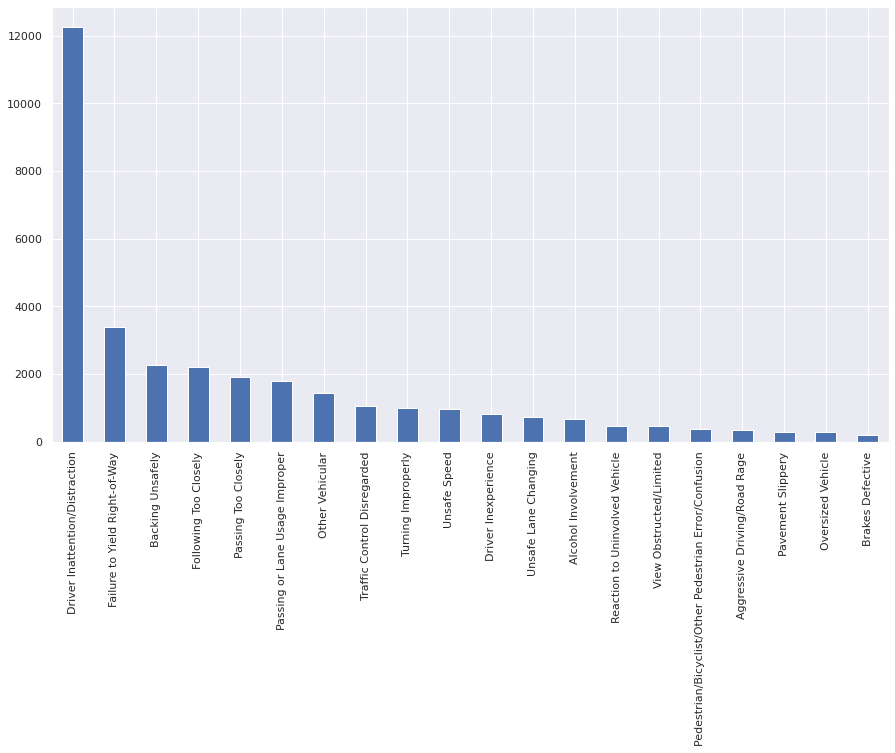

In [165]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[:20].plot(kind='bar')

### Quantidade de ocorrências por 'BOROUGH' (distrito)

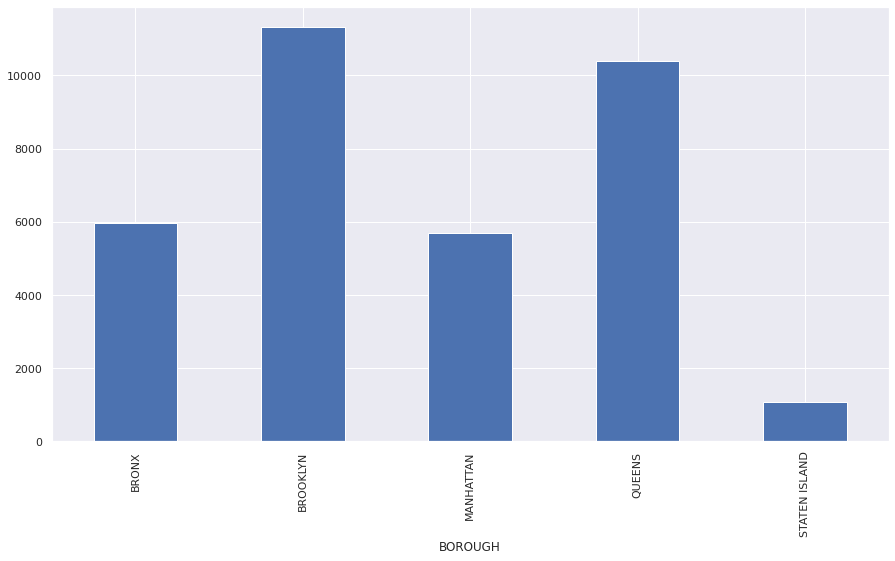

In [166]:
df.groupby(by=['BOROUGH']).size().plot(kind='bar')

### Quantidade de acidentes por fator com mortes

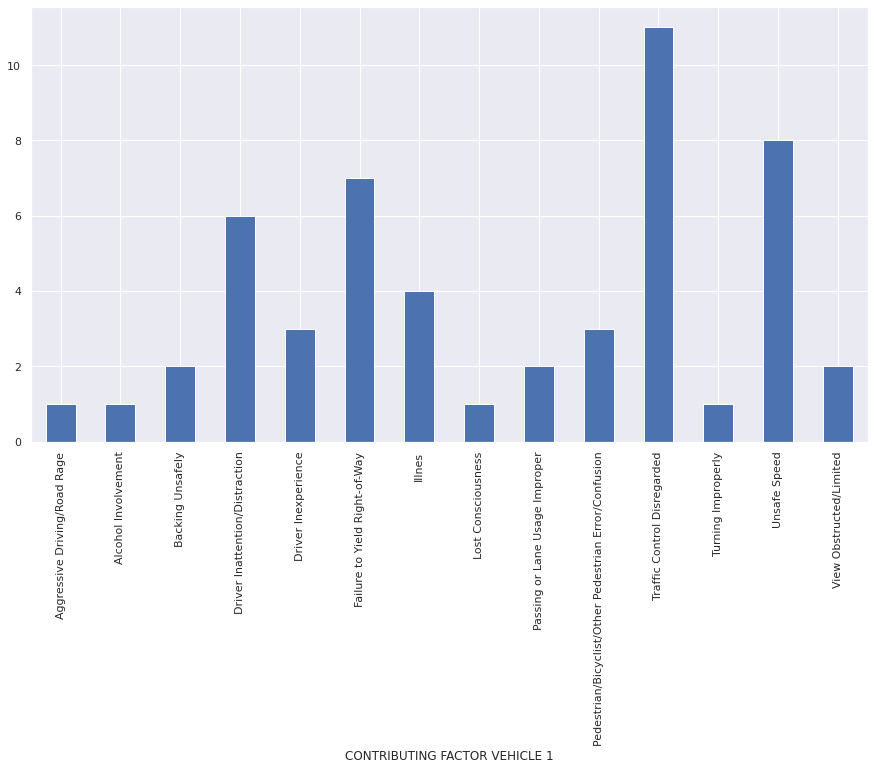

In [167]:
df[df["NUMBER OF PERSONS KILLED"] > 0].groupby("CONTRIBUTING FACTOR VEHICLE 1").size().plot(kind='bar')

### Quantidade de acidentes agrupados por distrito e fator

In [168]:
pd.DataFrame(df.groupby(by=['BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']).size())

0
BOROUGH       CONTRIBUTING FACTOR VEHICLE 1     
BRONX         Accelerator Defective            7
              Aggressive Driving/Road Rage    89
              Alcohol Involvement            135
              Animals Action                  12
              Backing Unsafely               404
...                                          ...
STATEN ISLAND Traffic Control Disregarded     44
              Turning Improperly              32
              Unsafe Lane Changing            13
              Unsafe Speed                    39
              View Obstructed/Limited          8

[232 rows x 1 columns]

### Tabela fator do acidente e quantidade de pessoas envolvidas (por tipo)

In [169]:
df_accidents = df[['CONTRIBUTING FACTOR VEHICLE 1', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 
                   'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 
                   'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].groupby(by=['CONTRIBUTING FACTOR VEHICLE 1']).sum()
df_accidents

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
CONTRIBUTING FACTOR VEHICLE 1,,,,,,,,
Accelerator Defective,14,0,1,0,0,0,13,0
Aggressive Driving/Road Rage,149,1,42,0,14,0,93,1
Alcohol Involvement,335,1,19,1,11,0,305,0
Animals Action,10,0,0,0,0,0,10,0
Backing Unsafely,309,2,143,2,22,0,144,0
Brakes Defective,83,0,3,0,5,0,75,0
Cell Phone (hand-Held),12,0,1,0,2,0,9,0
Cell Phone (hands-free),4,0,1,0,0,0,3,0
Driver Inattention/Distraction,4453,6,784,3,766,1,2903,2


Text(0.5, 1.0, 'Dencidades de colisões por distrito em NYC')

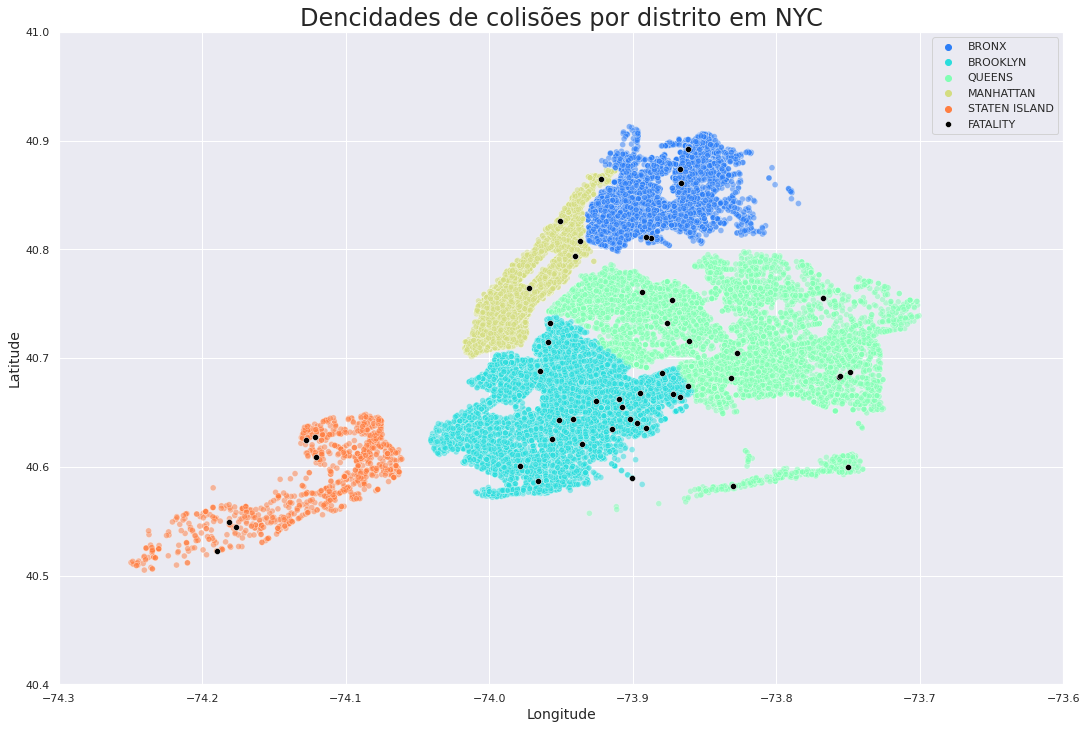

In [170]:
plt.figure(figsize=(18,12))

sns.scatterplot(x="LONGITUDE",y="LATITUDE",data=df,hue="BOROUGH",palette="rainbow",
               alpha=0.5)
plt.ylim(40.4,41)
plt.xlim(-74.3,-73.6)
plt.ylabel("Latitude",fontsize=14)
plt.xlabel("Longitude",fontsize=14)

sns.scatterplot(x="LONGITUDE",y="LATITUDE",data=df[df["NUMBER OF PERSONS KILLED"]>0],color="black",label="FATALITY")
plt.title("Dencidades de colisões por distrito em NYC",fontsize=24)

#### Separando por dia, mês e hora

In [171]:
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["MONTH"] = df["CRASH DATE"].dt.month
df["WEEKDAY"] = df["CRASH DATE"].dt.weekday
df["HOUR"] = pd.to_datetime(df["CRASH TIME"]).dt.hour

### Número de acidentes por mês

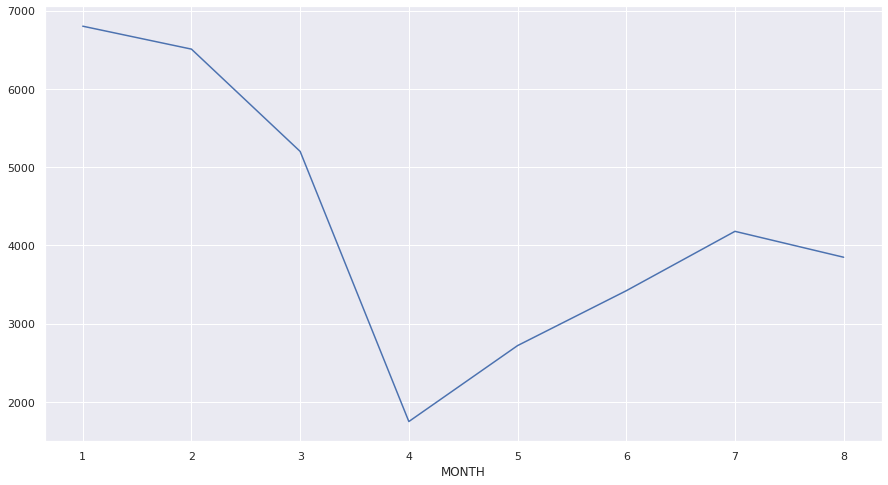

In [172]:
df.groupby("MONTH").size().plot()

### Número de acidentes por dia de semana

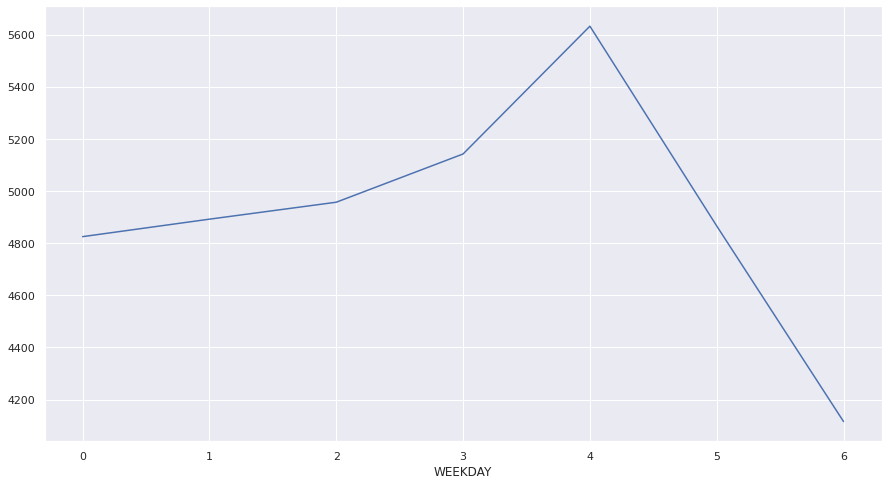

In [173]:
df.groupby("WEEKDAY").size().plot()

### Número de acidentes nas horas do dia

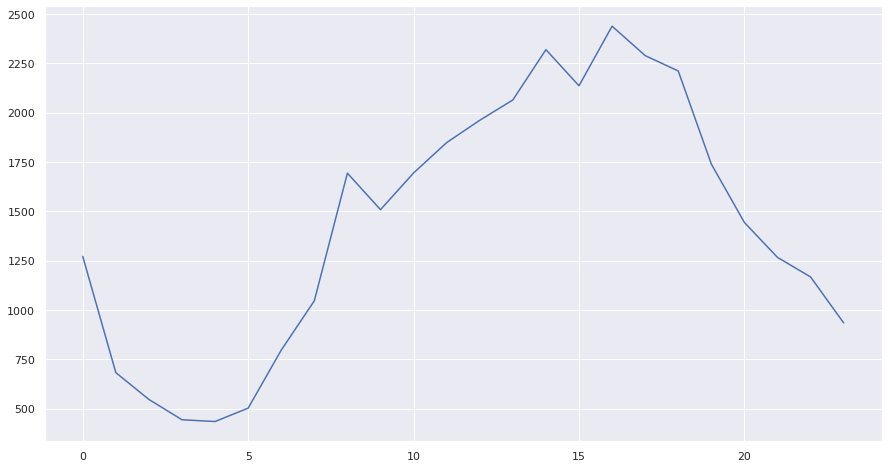

In [174]:
df["HOUR"].value_counts(sort=False).plot()

### 50 primeiras ruas com maior número de acidentes

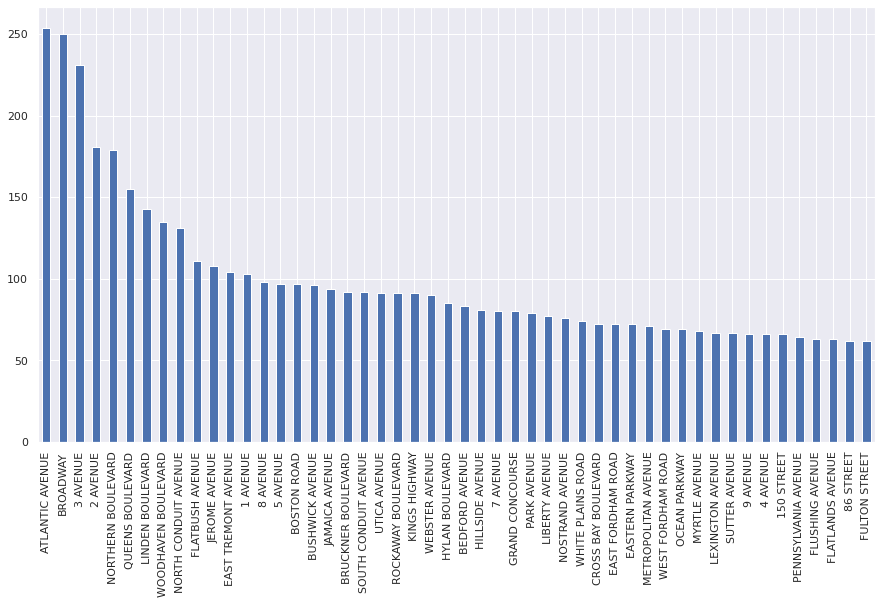

In [175]:
df['ON STREET NAME'].value_counts()[:50].plot(kind='bar')

### 50 cruzamentos com maior número de acidentes

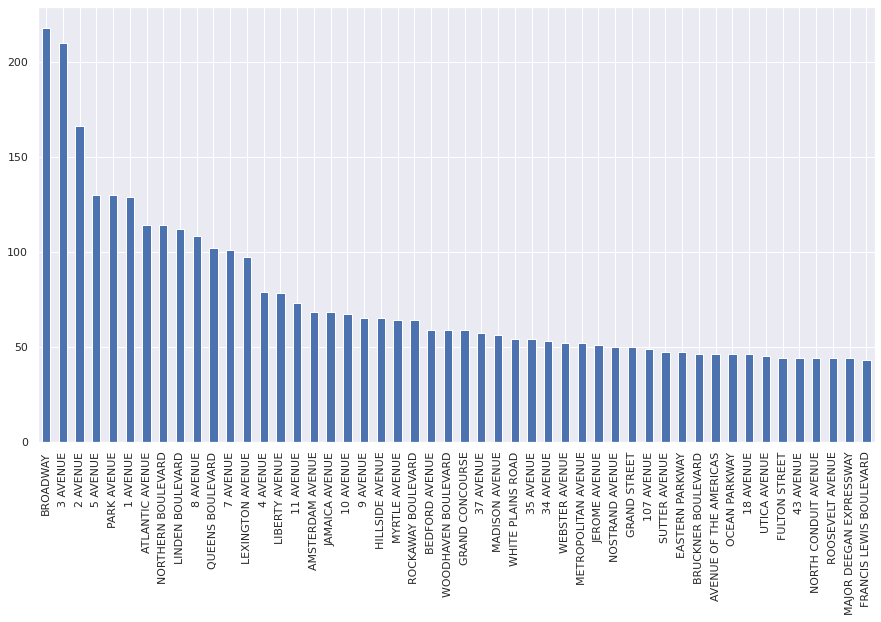

In [176]:
df['CROSS STREET NAME'].value_counts()[:50].plot(kind='bar')